In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
# Data wrangling to combine 3 data sets of collagenase titration
#
# Note that bud counting for 2 of them (20200911-12 and 20200917-18) were performed
# after re-orgnization of the image data, so these two data sets are already combined


# Time 2 h for 20200911-12 and 20200917-18 data sets
df1 = pd.read_csv('../data/SMG-bud-count-collagenase-titration/20200911-17-E13-SMG-collagenase-titration-t2h-budCount.txt')
df1.rename(columns={'file name': 'file_name',
                    'number of buds':'bud_number'},
           inplace=True)
df1 = df1[:-3] # only plot up to 2 ug/mL

# Time 2 h for 20210125-26 data set
df2 = pd.read_csv('../data/SMG-bud-count-collagenase-titration/20210125-collagenase-dose-E13p5-0d-45921-budCount.txt')

# Concatenate data for 2 h
df_t1 = pd.concat([df1, df2])
df_t1.reset_index(inplace=True, drop=True)
df_t1.rename(columns={'file_name': 'file_name_2h',
                      'bud_number': 'bud_number_2h'},
             inplace=True)

# Time 24 h for 20200911-12 and 20200917-18 data sets
df1 = pd.read_csv('../data/SMG-bud-count-collagenase-titration/20200912-18-E13-SMG-collagenase-titration-t24-budCount.txt')
df1.rename(columns={'file name': 'file_name', 'number of buds':'bud_number'},
           inplace=True)
df1 = df1[:-3] # only plot up to 2 ug/mL

# Time 24 h for 20210125-26 data set
df2 = pd.read_csv('../data/SMG-bud-count-collagenase-titration/20210126-collagenase-dose-E13p5-1d-264548-budCount.txt')

# Concatenate data for 2 h
df_t2 = pd.concat([df1, df2])
df_t2.reset_index(inplace=True, drop=True)
df_t2.rename(columns={'file_name': 'file_name_24h',
                      'bud_number': 'bud_number_24h'},
             inplace=True)

# Concatenate data of 2 time points horizontally
df = pd.concat([df_t1, df_t2], axis=1)

# Annotate experimental groups
# Groups 1-4: 0, 0.02, 0.2 and 2 µg/mL collagenase for 24 hours
groups = ['1'] * 5 + ['2'] * 5 + ['3'] * 6 + ['4'] * 3 + \
         ['1'] * 5 + ['2'] * 5 + ['3'] * 5 + ['4'] * 5
df['groups'] = groups

# Calculate the bud count ratios
df['bud_ratio'] = df['bud_number_24h'] / df['bud_number_2h']
df.head()

,file_name_2h,bud_number_2h,file_name_24h,bud_number_24h,groups,bud_ratio
0,20200911-E13-SMG-collagenase-1-0-001.nd2,3,20200912-E13-SMG-collagenase-1-0-001-t24.nd2,7,1,2.333333
1,20200911-E13-SMG-collagenase-1-0-002.nd2,3,20200912-E13-SMG-collagenase-1-0-002-t24.nd2,10,1,3.333333
2,20200911-E13-SMG-collagenase-1-0-003.nd2,5,20200912-E13-SMG-collagenase-1-0-003-t24.nd2,17,1,3.400000
3,20200917-E12-13-collagenase-1-0ugPmL-004.nd2,5,20200918-E12-13-collagenase-1-0ugPmL-004.nd2,10,1,2.000000
4,20200917-E12-13-collagenase-1-0ugPmL-005.nd2,5,20200918-E12-13-collagenase-1-0ugPmL-005.nd2,19,1,3.800000


<AxesSubplot:xlabel='groups', ylabel='bud_ratio'>

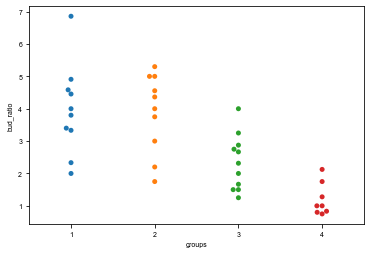

In [3]:
# Quick overview of the raw data
sns.swarmplot(data=df, x='groups', y='bud_ratio')

In [4]:
# Stat test
tukeyTest(df.bud_ratio, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0752    0.9 -1.3578  1.2074  False
     1      3   -1.624 0.0068 -2.8771 -0.3709   True
     1      4  -2.7751  0.001 -4.1355 -1.4147   True
     2      3  -1.5488 0.0105 -2.8019 -0.2957   True
     2      4  -2.6999  0.001 -4.0603 -1.3395   True
     3      4  -1.1511 0.1108 -2.4837  0.1815  False
----------------------------------------------------
p values of all pair-wise tests:
 [0.9        0.00683864 0.001      0.01048293 0.001      0.11079918]


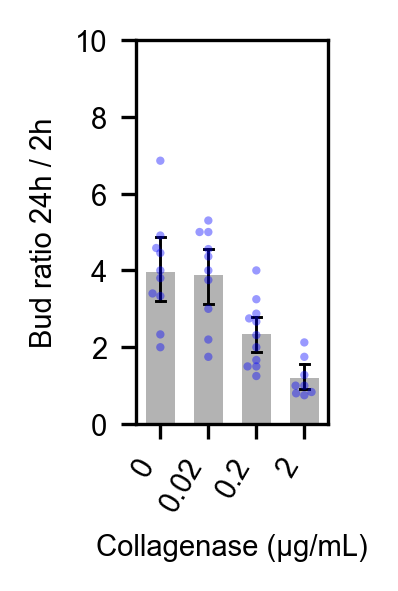

In [5]:
# Composite wwarm and bar plot of different collagenase concentrations

outputPrefix = 'SMG-collagenase-titration-swarm-bar'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.8
fig_height=1.6
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(data=df, x='groups', y='bud_ratio',
                   color="blue",
                   size=2.0,
                   alpha=.4)

ax = sns.barplot(data=df, x='groups', y='bud_ratio',
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 10)
# plt.yticks([0, 10, 20])

plt.xlabel("Collagenase (µg/mL)")
plt.ylabel("Bud ratio 24h / 2h")

# rotate x tick labels if necessary
x_labels = ['0', '0.02', '0.2', '2']
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .6)

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)
